In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_excel('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/NISTARPA-E Database/Git Repo/1. Zeolite-CO2 Data/Data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304 entries, 0 to 11303
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adsorbent                 11304 non-null  object 
 1   adsorbates                11304 non-null  object 
 2   temperature(k)            11304 non-null  int64  
 3   pressure                  11304 non-null  float64
 4   pressureUnits             11304 non-null  object 
 5   total_adsorption          11304 non-null  float64
 6   adsorptionUnits           11304 non-null  object 
 7   DOI                       11304 non-null  object 
 8   pore diameter (A)         11107 non-null  float64
 9   micro pore volume (ml/g)  11107 non-null  float64
 10  BET surface area (m2/g)   11107 non-null  float64
 11  Cation                    11107 non-null  object 
 12  Si/Al ratio               11049 non-null  float64
 13  Company of adsorbent      8562 non-null   object 
 14  shape 

In [4]:
pd.DataFrame(df.nunique(), columns =['Number of unique value'])

,Number of unique value
adsorbent,66
adsorbates,1
temperature(k),37
pressure,9027
pressureUnits,1
total_adsorption,9027
adsorptionUnits,13
DOI,89
pore diameter (A),29
micro pore volume (ml/g),29


 # adsorptionUnits

In [90]:
df['adsorbent'].unique()

array(['Zeolite LS-Li-KFI', 'Zeolite 5A', 'Zeolite 13X', 'Zeolite Na-A',
       'Cu(I)–NaY zeolite', 'Zeolite 4A', 'ZSM-5(58) Zeolite',
       'ZSM-5(295) Zeolite', 'Zeolite IFO', 'Zeolite JSR', 'Zeolite OKO',
       'Zeolite SEW', 'Zeolite Köstrolith NaMSXK', 'Zeolite Y',
       'STT Zeolite', 'Zeolite 13X / Carbon Honeycomb Monolith',
       'BR-Zeolite 4a', 'NaY zeolite', 'Ammonium ZSM-5',
       '13X zeolite with Si/Al = 1.4', 'zeolite NaKA (10.2% K+)',
       'zeolite NaKA (14.7% K+)', 'zeolite NaKA (12.8% K+)',
       'zeolite NaKA (22.5% K+)', 'zeolite NaKA (29.3% K+)',
       'Zeolite MFI', 'Zeolite LTA', 'Zeolite X', 'Zeolite Na-Y',
       'Zeolite DD3R', 'Zeolite NaX@NaA core-shell',
       'Zeolite KX@KA core-shell', 'Zeolite Na-LSX', 'Zeolite DAY',
       'Zeolite FAU-I', 'Zeolite 13A', 'ZSM-5 zeolite (Si/Al=60)',
       'ZSM-5 zeolite (Si/Al=15)', 'ZSM-5 zeolite (Si/Al=29)',
       'Zeolite MOR', 'Zeolite MTT', 'Zeolite GIS', 'Zeolite MWW',
       'Zeolite RHO', 'Zeolite M

In [6]:
df['adsorptionUnits'].unique()

array(['mmol/g', 'mol/m3', 'mmol/kg', 'cm3(STP)/g', 'mmol/m2', 'kg/mol',
       'mol/l', 'mg/g', 'mol/g', 'molecules/unitcell', 'wt%',
       'cm3(STP)/cm3', 'mol/m2'], dtype=object)

In [6]:
df['adsorptionUnits'].value_counts()

adsorptionUnits
mmol/g                10418
molecules/unitcell      269
cm3(STP)/g              250
mmol/kg                  82
mmol/m2                  64
mol/l                    51
wt%                      39
kg/mol                   33
mol/m3                   28
mg/g                     24
cm3(STP)/cm3             20
mol/g                    16
mol/m2                   10
Name: count, dtype: int64

In [91]:
# Convert adsorption
masks= {
    'cm3(STP)/g' : df['adsorptionUnits']== 'cm3(STP)/g',
    'mmol/kg' : df['adsorptionUnits']== 'mmol/kg',
    'mol/g' : df['adsorptionUnits']== 'mol/g'
}

df.loc[masks['cm3(STP)/g'], 'total_adsorption'] = df.loc[masks['cm3(STP)/g'], 'total_adsorption']
df.loc[masks['mmol/kg'], 'total_adsorption'] = (df.loc[masks['mmol/kg'], 'total_adsorption'] / 1000).round(9)
df.loc[masks['mol/g'], 'total_adsorption'] = (df.loc[masks['mol/g'], 'total_adsorption'] * 1000).round(3)
df.loc[masks['cm3(STP)/g'] | masks['mmol/kg'] | masks['mol/g'], 'adsorptionUnits'] = 'mmol/g'

In [92]:
df= df[df['adsorptionUnits'] == 'mmol/g']

In [93]:
df['adsorptionUnits'].value_counts()

adsorptionUnits
mmol/g    10766
Name: count, dtype: int64

In [82]:
df.isna().sum()

adsorbent                      0
adsorbates                     0
temperature(k)                 0
pressure                       0
pressureUnits                  0
total_adsorption               0
adsorptionUnits                0
DOI                            0
pore diameter (A)              0
micro pore volume (ml/g)       0
BET surface area (m2/g)        0
Cation                         0
Si/Al ratio                    0
Company of adsorbent        2407
shape                       4968
dtype: int64

In [31]:
def fill_with_mean(x):
    if x.notna().sum() > 0:  # Check if there are non-NaN values
        return x.fillna(x.mean())
    else:
        return x  # Return as is if all values are NaN
df['micro pore volume (ml/g)'] = df.groupby(['adsorbent'])['micro pore volume (ml/g)'].transform(fill_with_mean)

In [37]:
# # Calculate means first, then map them
# means = df.groupby('adsorbent')['BET surface area (m2/g)'].mean()
# df['BET surface area (m2/g)'] = df['BET surface area (m2/g)'].fillna(
#     df['adsorbent'].map(means)
# )

In [81]:
df['Si/Al ratio'] = df['Si/Al ratio'].fillna(df['Si/Al ratio'].mean())
df['BET surface area (m2/g)'] = df['BET surface area (m2/g)'].fillna(df['BET surface area (m2/g)'].mean())
df['micro pore volume (ml/g)'] = df['micro pore volume (ml/g)'].fillna(df['micro pore volume (ml/g)'].mean())
df['pore diameter (A)'] = df['pore diameter (A)'].fillna(df['pore diameter (A)'].mean())
df['Cation'] = df['Cation'].fillna(df['Cation'].mode()[0])

In [39]:
# ### df.groupby(['adsorbent'])['Cation'].agg(pd.Series.mode).to_frame()
# ### df['Cation'] = df.groupby(['adsorbent'])['Cation'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x.fillna('Unknown'))
# df['Si/Al ratio'] = df.groupby(['adsorbent'])['Si/Al ratio'].transform(lambda x: x.fillna(x.mean()))
# df['Si/Al ratio'] = df.groupby(['Cation'])['Si/Al ratio'].transform(lambda x: x.fillna(x.mean()))

In [56]:
# df.to_csv('CleanDataForMohammad.csv',index=False)

# remove useless columns

In [94]:
df.drop(columns= ['adsorbates', 'pressureUnits', 'adsorptionUnits', 'DOI','Company of adsorbent', 'shape'], inplace= True, axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10766 entries, 0 to 11303
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adsorbent                 10766 non-null  object 
 1   temperature(k)            10766 non-null  int64  
 2   pressure                  10766 non-null  float64
 3   total_adsorption          10766 non-null  float64
 4   pore diameter (A)         10628 non-null  float64
 5   micro pore volume (ml/g)  10628 non-null  float64
 6   BET surface area (m2/g)   10628 non-null  float64
 7   Cation                    10628 non-null  object 
 8   Si/Al ratio               10570 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 841.1+ KB


In [99]:
df['adsorbent'].value_counts()

adsorbent
Zeolite 13X          2833
Ammonium ZSM-5       2130
Zeolite 5A           1469
Zeolite 4A            798
ZSM-5(58) Zeolite     261
Zeolite CHA           153
Zeolite MFI           149
Zeolite DDR           133
Zeolite Na-Y          132
NaY zeolite           108
Zeolite GIS           105
Name: count, dtype: int64

In [98]:
df = df.groupby('adsorbent').filter(lambda x: len(x) >= 100)

In [53]:
df['Cation'].value_counts()

Cation
Na     6318
NH4    2623
Ca     1484
K       124
Li       88
TPA      53
H        44
Sr       17
Mg       15
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

le =LabelEncoder()

df['adsorbent'] = le.fit_transform(df['adsorbent'])
adsorbent_labels = le.classes_

df['Cation'] = le.fit_transform(df['Cation'])
cation_labels = le.classes_

In [86]:
print(adsorbent_labels)
print(cation_labels)

['13X zeolite with Si/Al = 1.4' 'Ammonium ZSM-5' 'BR-Zeolite 4a'
 'Cu(I)–NaY zeolite' 'NaY zeolite' 'STT Zeolite'
 'ZSM-5 zeolite (Si/Al=15)' 'ZSM-5 zeolite (Si/Al=29)'
 'ZSM-5 zeolite (Si/Al=60)' 'ZSM-5(295) Zeolite' 'ZSM-5(58) Zeolite'
 'Zeolite 13A' 'Zeolite 13X' 'Zeolite 13X / Carbon Honeycomb Monolith'
 'Zeolite 4A' 'Zeolite 4A S0.3' 'Zeolite 4A S5.0' 'Zeolite 5A'
 'Zeolite ALPO-17' 'Zeolite BEA' 'Zeolite CHA' 'Zeolite DD3R'
 'Zeolite DDR' 'Zeolite EDI' 'Zeolite ERI' 'Zeolite FAU' 'Zeolite FAU-I'
 'Zeolite FER' 'Zeolite GIS' 'Zeolite GME' 'Zeolite IFO' 'Zeolite ISV'
 'Zeolite JSR' 'Zeolite K-ZK-5' 'Zeolite KX@KA core-shell'
 'Zeolite Köstrolith NaMSXK' 'Zeolite LS-Ca-KFI' 'Zeolite LS-K-KFI'
 'Zeolite LS-Li-KFI' 'Zeolite LS-Mg-KFI' 'Zeolite LS-Na-KFI'
 'Zeolite LS-Sr-KFI' 'Zeolite LTA' 'Zeolite LTL' 'Zeolite Li-ZK-5'
 'Zeolite MER' 'Zeolite MFI' 'Zeolite MOR' 'Zeolite MTT' 'Zeolite MWW'
 'Zeolite Na-A' 'Zeolite Na-LSX' 'Zeolite Na-Y' 'Zeolite Na-ZK-5'
 'Zeolite NaX@NaA core-shell' 

In [88]:
df['adsorbent'].value_counts()

adsorbent
12    2833
1     2130
17    1469
14     798
10     261
      ... 
58      11
63       6
61       5
64       5
60       4
Name: count, Length: 65, dtype: int64

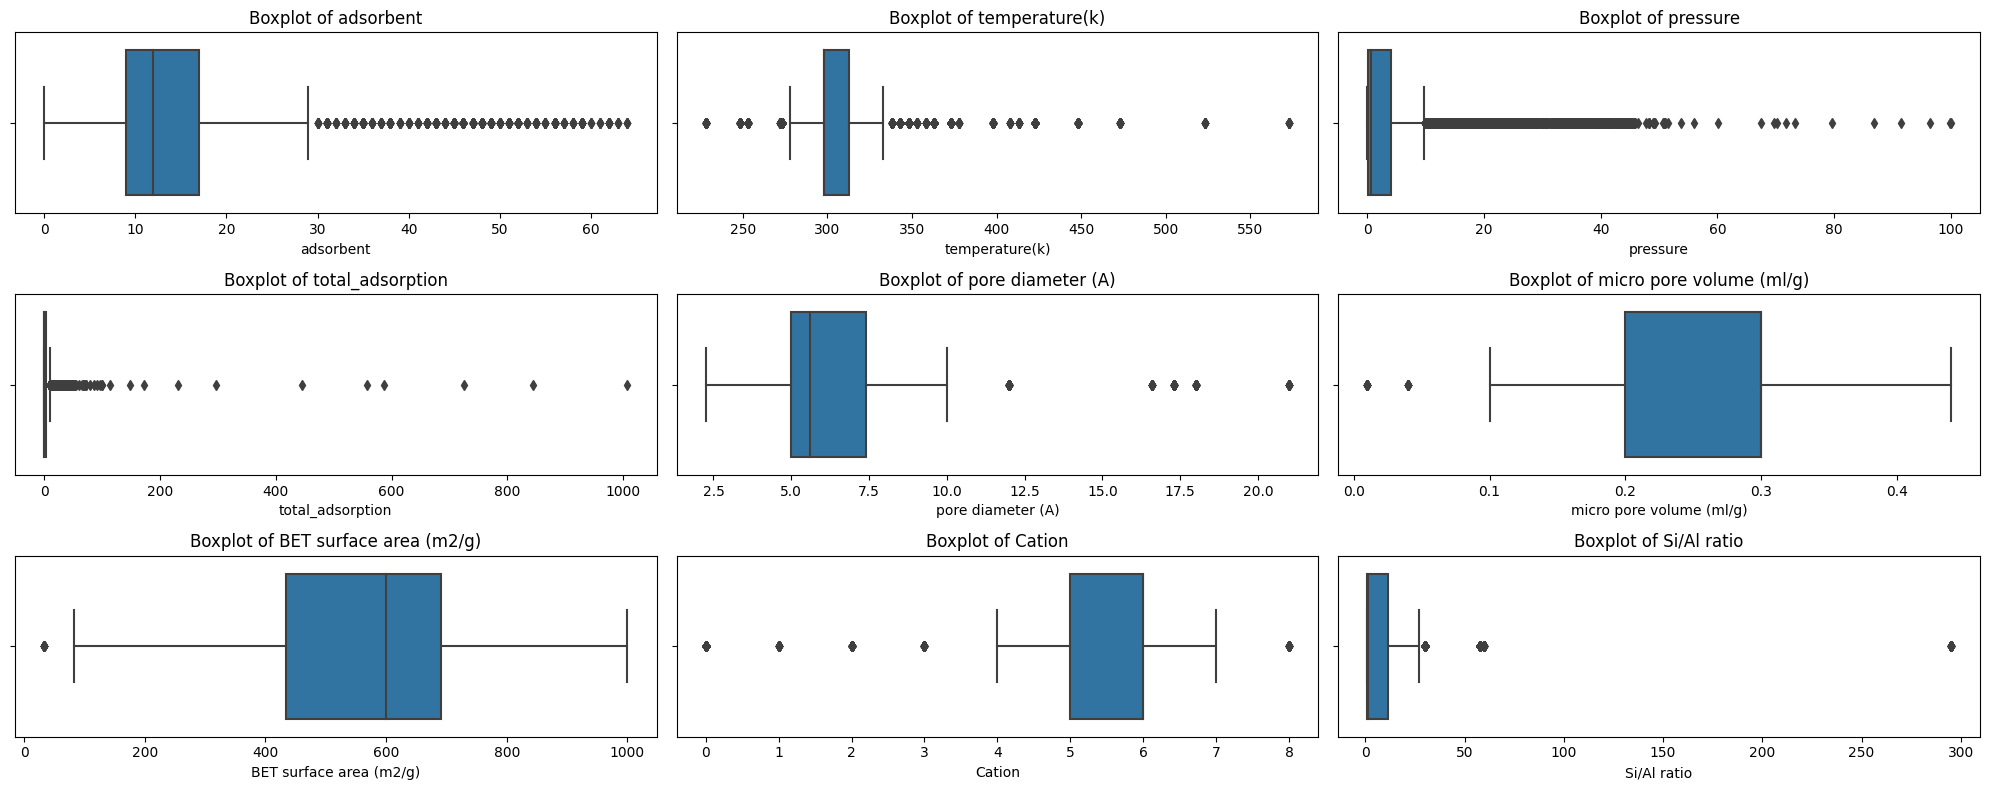

In [87]:
ncols=3
nrows=int (len(df.columns)/ ncols)
fig, axes= plt.subplots(nrows, ncols, figsize=(20, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, x= col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [75]:
df = df[df['total_adsorption'] < 40]
df = df[df['pressure'] < 40]
df = df[df['temperature(k)'] < 350]
df = df[df['Si/Al ratio'] <= 50]
df = df[df['Cation'] <= 7]
df = df[df['Cation'] >= 4]

In [72]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

In [73]:
df_std.head()

,adsorbent,temperature(k),pressure,total_adsorption,pore diameter (A),micro pore volume (ml/g),BET surface area (m2/g),Cation,Si/Al ratio
0,0.59375,0.625,0.005973,0.005973,0.088,0.441963,0.474664,0.375,0.023103
1,0.59375,0.625,0.012999,0.012999,0.088,0.441963,0.474664,0.375,0.023103
2,0.59375,0.625,0.030621,0.030621,0.088,0.441963,0.474664,0.375,0.023103
3,0.59375,0.625,0.071193,0.071193,0.088,0.441963,0.474664,0.375,0.023103
4,0.59375,0.625,0.170735,0.170735,0.088,0.441963,0.474664,0.375,0.023103


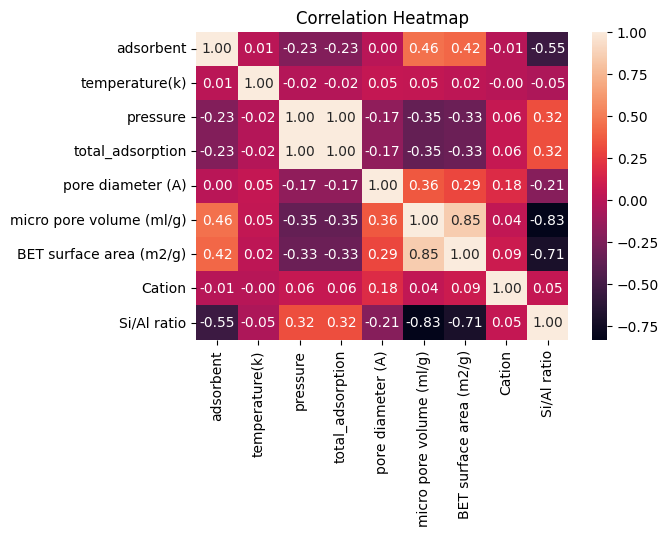

In [74]:
plt.figure(figsize= (6,4))
sns.heatmap(df_std.corr(), fmt='.2f', annot= True)
plt.title('Correlation Heatmap')
plt.show()


In [50]:
df_std.head()

,adsorbent,temperature(k),pressure,total_adsorption,pore diameter (A),micro pore volume (ml/g),BET surface area (m2/g),Cation,Si/Al ratio
0,0.59322,0.441176,0.002389,1.479008e-08,0.088,0.441963,0.474664,0.375,0.023103
1,0.59322,0.441176,0.005200,3.218812e-08,0.088,0.441963,0.474664,0.375,0.023103
2,0.59322,0.441176,0.012249,7.582193e-08,0.088,0.441963,0.474664,0.375,0.023103
3,0.59322,0.441176,0.028478,1.762856e-07,0.088,0.441963,0.474664,0.375,0.023103
4,0.59322,0.441176,0.068297,4.227708e-07,0.088,0.441963,0.474664,0.375,0.023103


In [51]:
from sklearn.model_selection import train_test_split

X = df_std.drop(['total_adsorption'], axis=1)
y = df_std['total_adsorption']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .8, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
estimators = {
    'LinearRegression' : LinearRegression(),
    'SVR' : SVR(),
    'DecisionTreeRegressor' : DecisionTreeRegressor(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor()
}
for estimator_name, estimator_object in estimators.items():
    estimator_object.fit(X_train, y_train)
    y_pred = estimator_object.predict(X_test)
    print(f"{estimator_name}\tr2_score: {r2_score(y_test, y_pred)}\tmse: {mean_squared_error(y_test, y_pred)}")

LinearRegression	r2_score: 8.262431498040623e-05	mse: 0.0005045275195140414
SVR	r2_score: -17.08485471126828	mse: 0.009125060840149083
DecisionTreeRegressor	r2_score: -3.0862331339864824e-05	mse: 0.0005045847813814299
RandomForestRegressor	r2_score: 0.14893178807721152	mse: 0.00042942281466455364
GradientBoostingRegressor	r2_score: 0.1523886924059683	mse: 0.0004276785671811151
AdaBoostRegressor	r2_score: -0.0003074191180776342	mse: 0.0005047243234206128


In [193]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)
print(f"SVR\tr2_score: {r2_score(y_test, y_pred)}\tmse: {mean_squared_error(y_test, y_pred)}")

SVR	r2_score: 0.8948000407378234	mse: 0.0044864462534037605


# predict new data with model

In [218]:
# Load new data
df_test = pd.read_excel('E:/Python Projects/shohreh/Shohreh_GitHub_Repository/NISTARPA-E Database/Adsorption project/Data - Copy.xlsx')
# clean and fit new data with model entry
df_test.dropna(subset= ['pore diameter (A)', 'micro pore volume (ml/g)', 'BET surface area (m2/g)', 'Cation', 'Si/Al ratio', 'Company of adsorbent', 'shape'], how='all', inplace= True)
df_test.drop(columns= ['adsorbates', 'pressureUnits', 'adsorptionUnits', 'DOI', 'Company of adsorbent', 'shape'], inplace= True, axis=1)
# adsorbent and cation label
for i in range(len(adsorbent_labels)):
    for j in range(len(df_test['adsorbent'].values)):
        if adsorbent_labels[i] == df_test['adsorbent'].values[j]:
            df_test['adsorbent'].values[j] = i
for i in range(len(cation_labels)):
    for j in range(len(df_test['Cation'].values)):
        if cation_labels[i] == df_test['Cation'].values[j]:
            df_test['Cation'].values[j] = i

df_test_std = pd.DataFrame(scaler.transform(df_test), columns= df_test.columns)

df_test_std.head()

,adsorbent,temperature(k),pressure,total_adsorption,pore diameter (A),micro pore volume (ml/g),BET surface area (m2/g),Cation,Si/Al ratio
0,0.7,0.655172,0.000388,0.000388,0.354839,0.555556,0.212598,0.0,0.0
1,0.7,0.655172,0.000284,0.000284,0.354839,0.555556,0.212598,0.0,0.0
2,0.7,0.655172,0.000378,0.000378,0.354839,0.555556,0.212598,0.0,0.0
3,0.7,0.655172,0.000424,0.000424,0.354839,0.555556,0.212598,0.0,0.0
4,0.7,0.655172,0.000469,0.000469,0.354839,0.555556,0.212598,0.0,0.0


In [219]:
X_new = df_test_std.drop(['total_adsorption'], axis=1)
y_new = df_test_std['total_adsorption']
y_new_pred= svr_model.predict(X_new)
print(f"SVR\tr2_score: {r2_score(y_new, y_new_pred)}\tmse: {mean_squared_error(y_new, y_new_pred)}")

SVR	r2_score: -1498.4506923798222	mse: 0.016931956955164824
